# Investigating the Relationship between Waist-to-Hip Ratio and Diabetes 

## Describing the Dataset

The dataset addresses risk factors for diabetes, obesity, and cardiovascular disease in study participants living in two counties in Virginia. These risk factos include cholesterol and glucose levels, systolic and diastolic pressures, as well as demographics such as participant age, height, weight, and hip size. This data was collected from 403 male and female participants from Virginia's Buckingham and Louisa counties.

Waist-to-hip ratio (WHR) is associated with increase risk of type 2 diabetes and coronary heart disease. The purpose of this analysis is to investigate the exploratory and predictory correlation between WHR and diabetes in a localised community.

In [1]:
#Dependencies 
knitr::opts_chunk$set(echo = TRUE)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
library(ggplot2)
library(readr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [3]:
#Read in csv
diabetes <- read_csv("diabetes.csv")

Parsed with column specification:
cols(
  id = col_double(),
  chol = col_double(),
  stab.glu = col_double(),
  hdl = col_double(),
  ratio = col_double(),
  glyhb = col_double(),
  location = col_character(),
  age = col_double(),
  gender = col_character(),
  height = col_double(),
  weight = col_double(),
  frame = col_character(),
  bp.1s = col_double(),
  bp.1d = col_double(),
  bp.2s = col_double(),
  bp.2d = col_double(),
  waist = col_double(),
  hip = col_double(),
  time.ppn = col_double()
)


In [4]:
#Dimensions of the dataset
dim(diabetes)

[1] 403  19

In [5]:
#Variable names
names(diabetes)

[1] "id"       "chol"     "stab.glu" "hdl"      "ratio"    "glyhb"   
 [7] "location" "age"      "gender"   "height"   "weight"   "frame"   
[13] "bp.1s"    "bp.1d"    "bp.2s"    "bp.2d"    "waist"    "hip"     
[19] "time.ppn"

In [6]:
#Preview the dataset
head(diabetes)

id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
1000,203,82,56,3.6,4.31,Buckingham,46,female,62,121,medium,118,59,NA,NA,29,38,720
1001,165,97,24,6.9,4.44,Buckingham,29,female,64,218,large,112,68,NA,NA,46,48,360
1002,228,92,37,6.2,4.64,Buckingham,58,female,61,256,large,190,92,185,92,49,57,180
1003,78,93,12,6.5,4.63,Buckingham,67,male,67,119,large,110,50,NA,NA,33,38,480
1005,249,90,28,8.9,7.72,Buckingham,64,male,68,183,medium,138,80,NA,NA,44,41,300
1008,248,94,69,3.6,4.81,Buckingham,34,male,71,190,large,132,86,NA,NA,36,42,195


## Correlation Analysis

Risk-factors such as WHR can be used to compare against glycosylated hemoglobin, which indicates diabetic status (5.7-6.4 = pre-diabetes, > 6.5 for diabetes). BMI and WHR were independently calculated using the data collected for weight, height, hip, and waist measurements. Higher WHR is often associated with heart disease, so the intent of this analysis is to explore whether it is also a risk-factor and precursor of diabetes.

WHR was set independently to WHR > 0.85 (females) and WHR > 0.90 (males) to indicate obesity. Additionally, the scale of the glycosylated hemoglobin variable was limited between 5 and 8 to better
indicate the transition from pre-diabetes to diabetes. These variablescan be visualized through scatter plots and examined via linear regression to determine either a positive or negative statistical relationship. Furthermore disparities in health outcomes can be examined based on gender.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
“Removed 284 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 284 rows containing missing values (geom_point).”

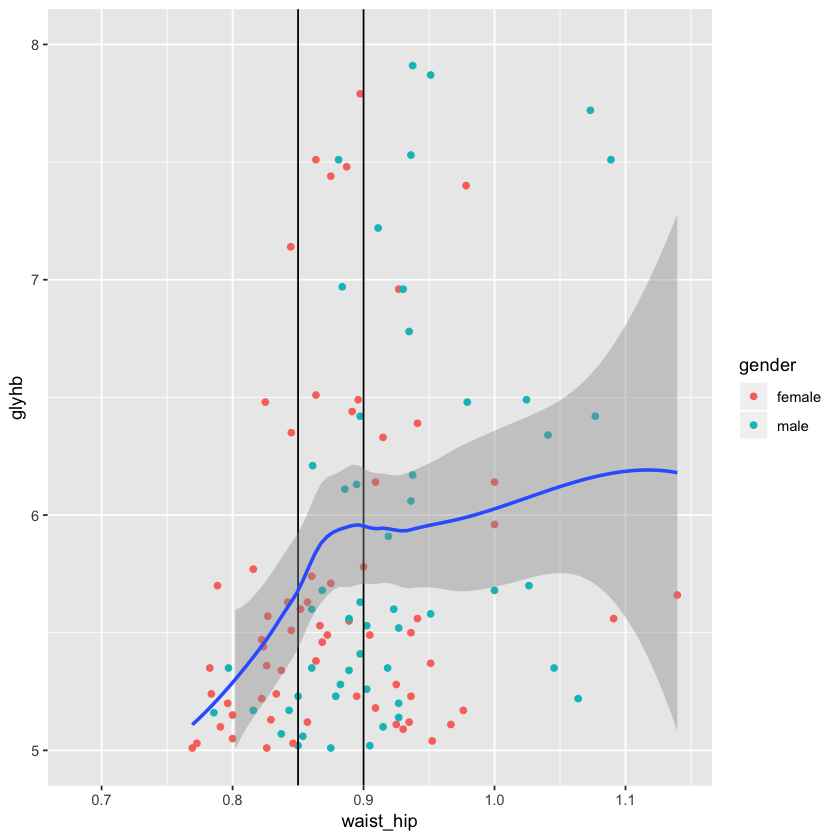

In [7]:
diabetes_wh <- diabetes %>% mutate(waist_hip = waist/hip)
scatter_wh <- ggplot(diabetes_wh, aes(x = waist_hip, y = glyhb)) +
geom_point(aes(col = gender)) +
ylim(5, 8) +
geom_vline(xintercept = 0.85) +
geom_vline(xintercept = 0.9) +
geom_smooth()
scatter_wh

For the scatter plot, the blue trend line and the grey confidence bands show a sharp incline from a WHR
from about 0.76 to about 0.87, and a slower incline from about 0.87 to about 1.4. This incline indicates
that a high WHR is correlated with higher levels of glycosylated hemoglobin, which determines
a diagnosis of pre-diabetes and diabetes. Furthermore, WHR can be used to predict pre-diabetes and
diabetes, as they are directly associated.

## Statistical Probability and Predictions

Sample: 169 male, 234 female total\
Probabiliity notation:\
DF = Pre-Diabetes Female, DF’ = Non-Diabetes Female, DM = Pre-Diabetes Male, DM’ = Non-Diabetes
Male, WF = Waist-Hip Ratio (WHR) Female, WM = WHR Male

Marginal: P(DF) = P(female glyhb levels greater than or equal to 5.7; prediabetic)\
= P(X ≥ 5.7) = 49/169\
= 0.28994\
\
P(DM) = P(male glyhb levels greater than or equal to 5.7; prediabetic)\
= P(X ≥ 5.7) = 40/234\
= 0.17094\
\
P(WF) = P(WHR women greater than 0.85) = P(X ≥ 0.85) = 126/234\
= 0.53846\
\
P(WM) = P(WHR men greater than 0.9) = P(X ≥ 0.9) = 91/169\
= 0.53846

Conditional (females): P(DF|W F) = (P(DF andW F))/P(W F)\
= (37/401)/(126/234)\
= 0.09227/0.53846\
= 0.17136\
Interpretation: The probability of being pre-diabetic, given the female WHR >= 0.85 for at-risk of diabetes,
is 0.17136 for females.\
\
Conditional (males): P(DM|WM) = (P(DM andWM))/P(WM)\
= (26/401)/(91/169)\
= 0.06484/0.53846\
= 0.12041\
Interpretation: The probability of being pre-diabetic, given the male WHR >= 0.9 for at-risk of diabetes,
is 0.12041 for males.

In [8]:
#Find distributions for the dataset range
wh_stats <- diabetes_wh %>% summarize(wh_mean = mean(waist/hip, na.rm = TRUE),
wh_med = median(waist/hip, na.rm = TRUE),
wh_sd = sd(waist/hip, na.rm = TRUE))
wh_stats

wh_mean,wh_med,wh_sd
0.880932,0.88,0.07236184


The parameters of a normal distribution are the standard deviation and the mean, on the condition that the mean is equal to the median.
In the waist-to-hip ratio distribution, we found that the mean = 0.880, median = 0.880, and standard deviation = 0.072. Since the mean and median are equal, we can conclude that this dataset is normally distributed.

Warning message:
“Removed 2 rows containing non-finite values (stat_qq).”Warning message:
“Removed 2 rows containing non-finite values (stat_qq_line).”

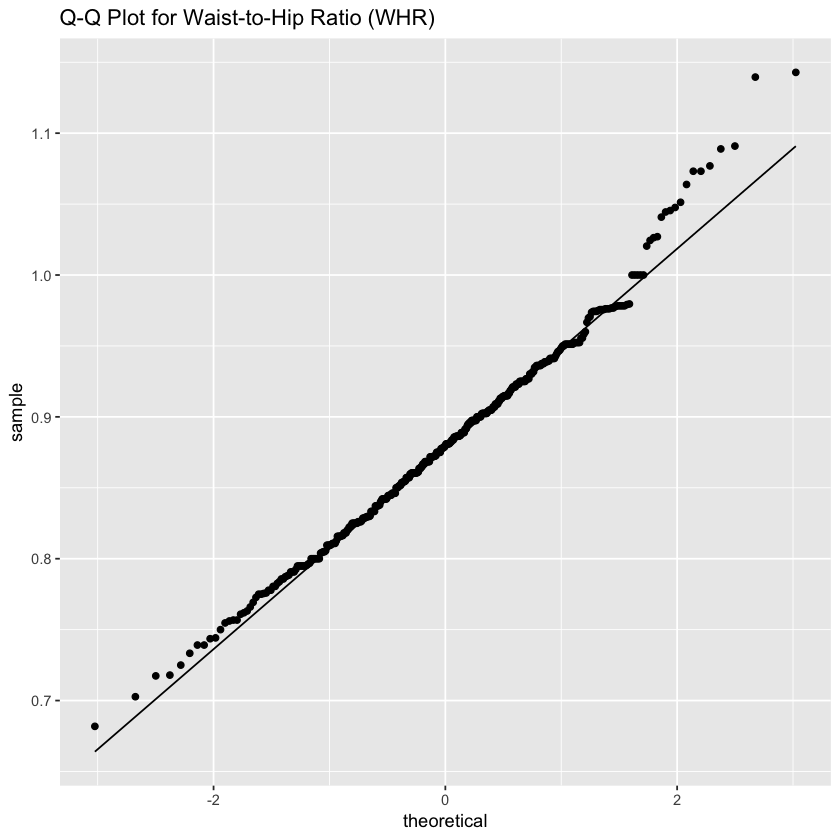

In [9]:
#Create a QQ plot for WHR
plot_wh <- ggplot(diabetes_wh, aes(sample = waist_hip)) + stat_qq() + stat_qq_line() +
ggtitle("Q-Q Plot for Waist-to-Hip Ratio (WHR)")
plot_wh

## The Central Limit Theorem

The Central Limit Theorem states that as sample size (n) increases, the sample mean more closely approaches
the true population mean (µ) and the spread decreases and more closely reflects a normal and symmetric
distribution.\
To demonstrate the Central Limit Theorem, different sampling distributions were calculated at n = 5, n = 50,
and n = 300, utilizing 50 random sampling trials for each distribution (via the sample_n() function in R). As
sample size n increased, the distribution grew more approximately normal with smaller variance in spread.
This is evident in the increasing accuracy of sample means in comparison to the true population statistic, µ.
µ is equal to 0.88, as described in previous sections.

Specifically, the sample_n() function was ran (for n = 5, n = 50, and n = 300) 51 times each, then 
the data was recorded in a CSV file titled “histogram_data.csv”. Below is an example of our process for 5 trials
of sample_n() for n = 300.

In [10]:
#Calculate different sampling distributions
size_300a <- sample_n(diabetes_wh, 300, replace = FALSE)
size_300aa <- size_300a %>% summarise(mean_whr_300 = mean(waist_hip, na.rm = TRUE))

size_300b <- sample_n(diabetes_wh, 300, replace = FALSE)
size_300bb <- size_300b %>% summarise(mean_whr_300 = mean(waist_hip, na.rm = TRUE))

size_300c <- sample_n(diabetes_wh, 300, replace = FALSE)
size_300cc <- size_300c %>% summarise(mean_whr_300 = mean(waist_hip, na.rm = TRUE))

size_300d <- sample_n(diabetes_wh, 300, replace = FALSE)
size_300dd <- size_300d %>% summarise(mean_whr_300 = mean(waist_hip, na.rm = TRUE))

size_300e <- sample_n(diabetes_wh, 300, replace = FALSE)
size_300ee <- size_300e %>% summarise(mean_whr_300 = mean(waist_hip, na.rm = TRUE))

size_300 <- c(size_300aa, size_300bb, size_300cc, size_300dd, size_300ee)
size_300

$mean_whr_300
[1] 0.8784073

$mean_whr_300
[1] 0.882138

$mean_whr_300
[1] 0.8835415

$mean_whr_300
[1] 0.8797614

$mean_whr_300
[1] 0.8794857

In [14]:
#Read in the histogram csv data
histogram_data <- read_csv("histogram.csv")

Parsed with column specification:
cols(
  size5 = col_double(),
  size50 = col_double(),
  size300 = col_double()
)


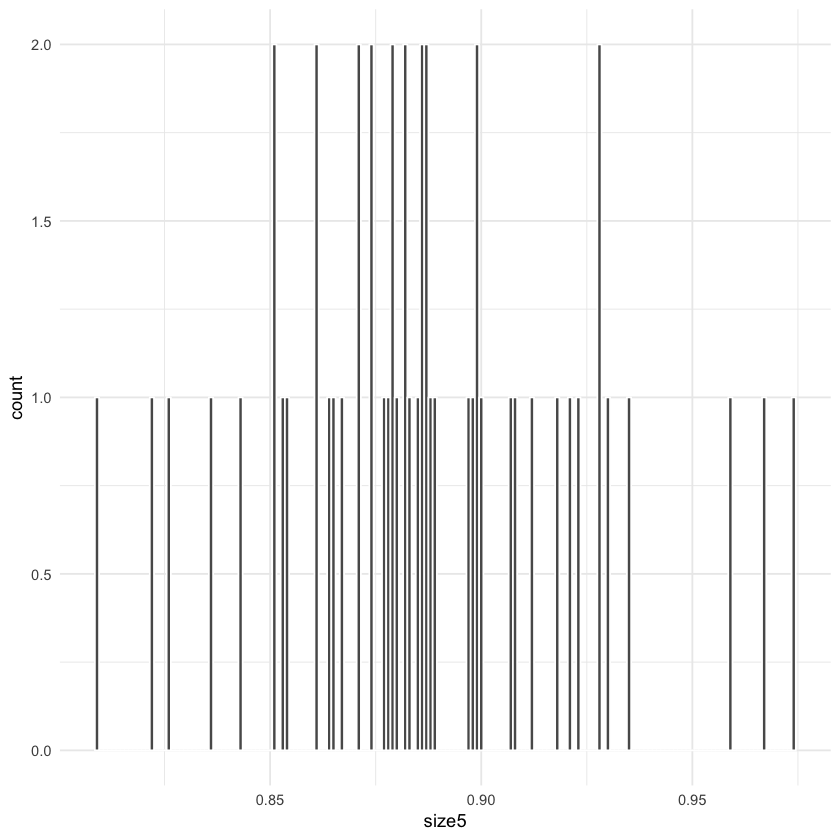

In [15]:
#Create a histogram for n = 5
hist_5 <- histogram_data %>% ggplot(aes(x = size5)) +
geom_histogram(binwidth = 0.001, color = "white") +
theme_minimal()
hist_5

At this sampling distribution of n = 5, the range is roughly 0.822 to 0.959. The distribution is not unimpdal and has lots of variability, and the mean is 0.886.

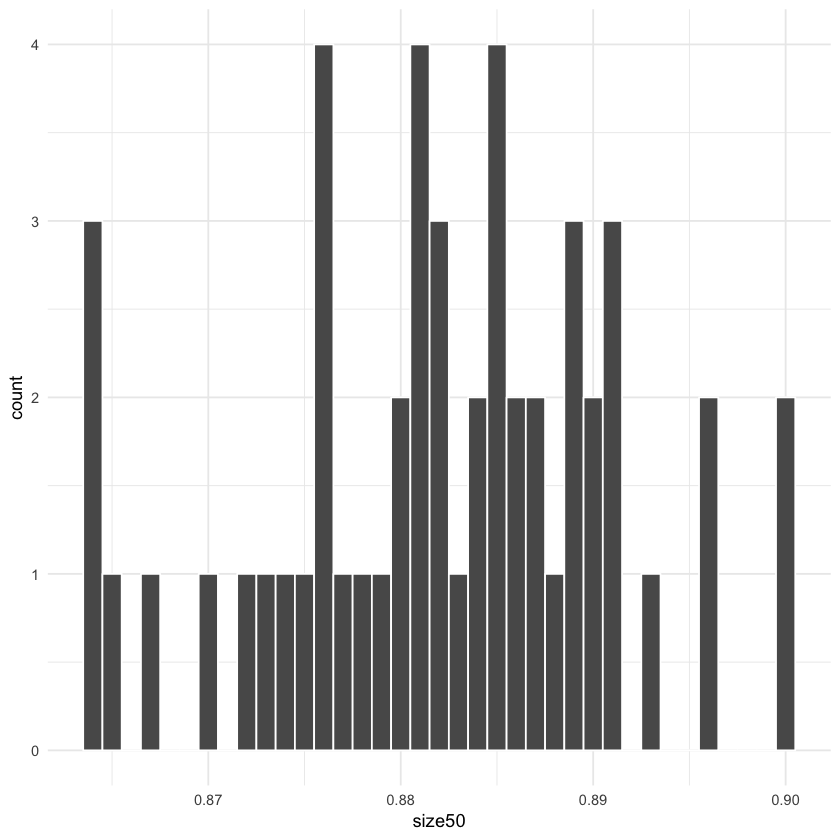

In [16]:
#Create a histogram for n = 50
hist_50 <- histogram_data %>% ggplot(aes(x = size50)) +
geom_histogram(binwidth = 0.001, color = "white") +
theme_minimal()
hist_50

At this sampling distribution of n = 50, the range is roughly 0.864 to 0.896. The distribution is approaching normal, more so than n = 5, and the mean is 0.882.

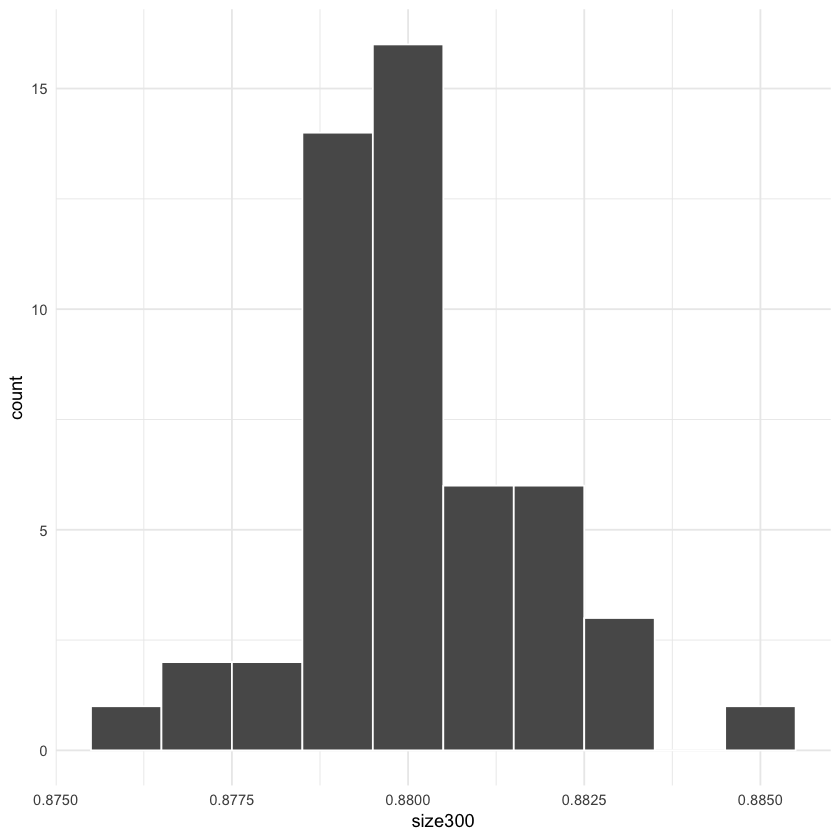

In [17]:
#Create a histogram for n = 300
hist_300 <- histogram_data %>% ggplot(aes(x = size300)) +
geom_histogram(binwidth = 0.001, color = "white") +
theme_minimal()
hist_300

At this sampling distribution of n = 300, the range is roughly 0.876 to 0.885. The distribution is roughly normal, will smaller variance than n = 5 and n = 50. The average is 0.880.

## Statistical Analysis

There is an established relationship between WHR and diabetes status
(determined by glycosylated hemoglobin levels). In order to further understand these conclusions, 
sample testing must be used to determine if there were significant differences within men and women for waist-to-hip ratio
association and diabetes, instead of a population as a whole. This is necessary to ensure that the association
exists for both men and women and is not the result of analyzing both subgroups at the same time.

Observing the histogram and boxplot that was made with the data, the glycosylated hemoglobin and WHR data for
men and women were not normally distributed, contained evident outliers, and presented similar variance
and spread. The observations of non-normal distribution, outliers, and similar variance and spread were
assessed using a visual methods to compare the overlap and measures of central tendency (median and
outliers) between the male and female populations. Thus, a non-parametric Wilcoxon
Rank Sum test was most appropriate for further statistical testing as it does not rely on a normal distribution.

The Wilcoxon Rank Sum Test can be used to compare diabetes prevalence through the outcome variable of
glycosylated hemoglobin levels between men and women, grouped by their waist-to-hip ratio. This test can be applied to compare whether the median differences in between two genders is truly significant or due to
random chance.

Warning message:
“Removed 13 rows containing non-finite values (stat_bin).”

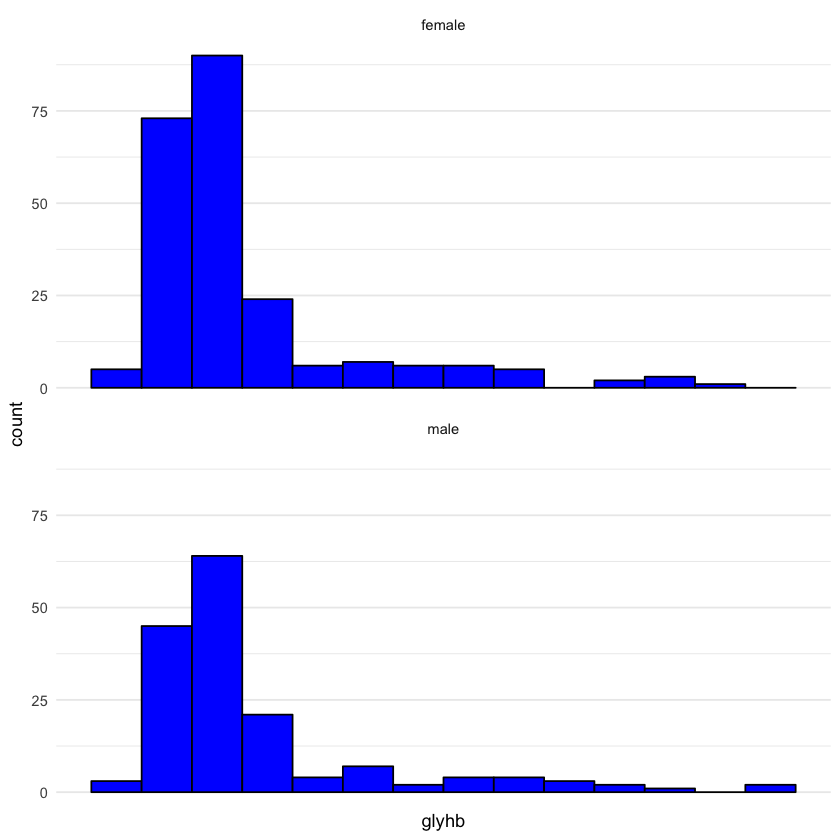

In [19]:
#Histogram for why a Wilcoxon Rank Sum Test is most appropriate
diabetes_wh %>% ggplot(aes(x = glyhb)) +
geom_histogram(binwidth = 1, col = "black", fill = "blue") +
scale_x_continuous(breaks = rep(0:1)) +
theme_minimal() +
facet_wrap(~factor(gender), nrow = 2)

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”

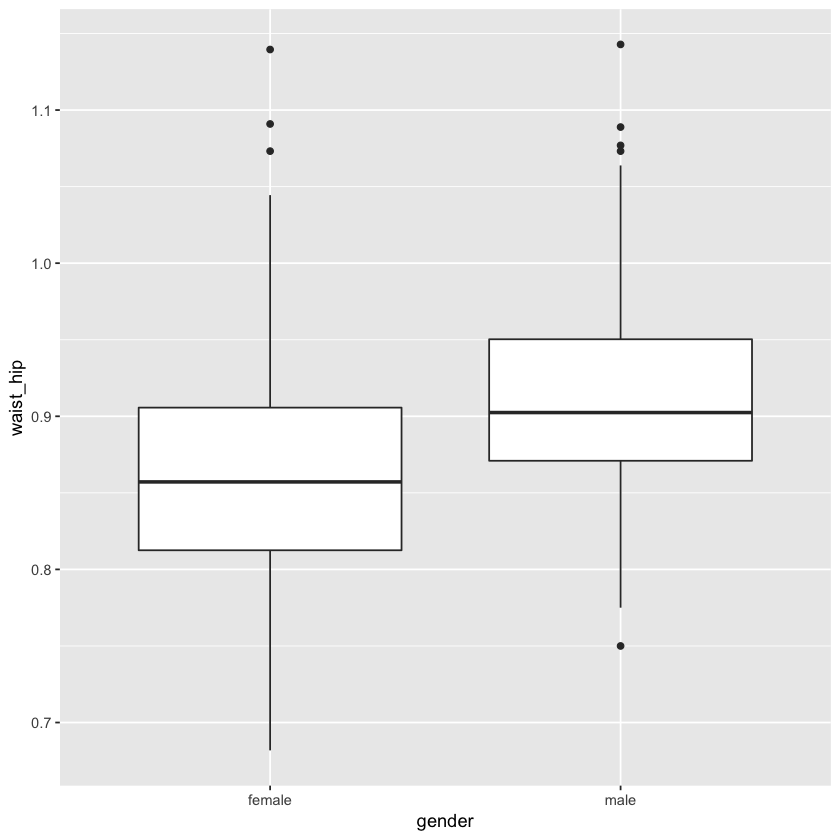

In [20]:
#Boxplot visualization for WHR
diabetes_wh %>% ggplot(aes(x = gender, y = waist_hip)) +
geom_boxplot()

Warning message:
“Removed 13 rows containing non-finite values (stat_boxplot).”

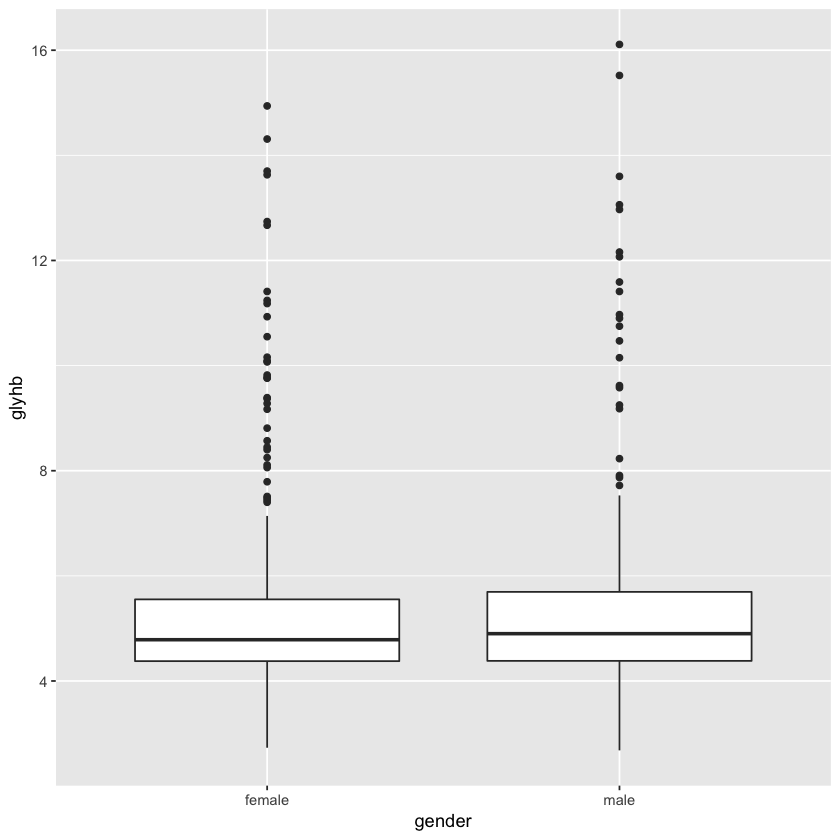

In [21]:
#Boxplot visualization for glycosylated hemoglobin levels
diabetes_wh %>% ggplot(aes(x = gender, y = glyhb)) +
geom_boxplot()

Two Wilcoxon rank sum tests were used, one for men and
one for women. \
• The null hypothesis was: there is no difference between the median glycosylated hemoglobin levels
between those who have a healthy waist-to-hip ratio and and those who have an unhealthy waist-to-hip
ratio.\
• The alternative hypothesis is: there is a difference between the median glycosylated hemoglobin levels
between those who have a healthy waist-to-hip ratio and and those who have an unhealthy waist-to-hip
ratio.

In [22]:
#Create female-specific dataset
diabetes_f <- diabetes_wh %>% filter(gender == "female")
#Create new column "whr" with status “unhealthy” for WHR equal to or over 0.85
diabetes_f$whr <- ifelse(diabetes_f$waist_hip>=0.85, "unhealthy", "healthy")

#Create male-specific dataset
diabetes_m <- diabetes_wh %>% filter(gender == "male")
#Create new column "whr" with status “unhealthy” for WHR equal to or over 0.9
diabetes_m$whr <- ifelse(diabetes_m$waist_hip>=0.9, "unhealthy", "healthy")

#Run two sample t-test between two genders
t.test(diabetes_f %>% pull(glyhb),
       diabetes_m %>% pull(glyhb),
       alternative = "two.sided")


	Welch Two Sample t-test

data:  diabetes_f %>% pull(glyhb) and diabetes_m %>% pull(glyhb)
t = -0.97814, df = 322, p-value = 0.3287
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6917966  0.2323326
sample estimates:
mean of x mean of y 
 5.494342  5.724074 


Conclusion from the Welch Two Sample t-test: Fail to reject the null hypothesis. There is no significant difference in means between male and female glyhb levels

In [23]:
#Run Wilcoxon rank sum test for female-specific datasets
wilcox.test(glyhb ~ whr, data = diabetes_f, conf.int = TRUE, paired=F)


	Wilcoxon rank sum test with continuity correction

data:  glyhb by whr
W = 5061, p-value = 0.00679
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -0.62005655 -0.09003463
sample estimates:
difference in location 
            -0.3400082 


In [24]:
#Run Wilcoxon rank sum test for male-specific datasets
wilcox.test(glyhb ~ whr, data = diabetes_m, conf.int = TRUE, paired=F)


	Wilcoxon rank sum test with continuity correction

data:  glyhb by whr
W = 2711, p-value = 0.0892
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -0.63001576  0.04998143
sample estimates:
difference in location 
            -0.2699488 


# Findings

FEMALES\
• Confidence Interval (CI): The 95% confidence interval for females is -0.62005655 to -0.09003463. This means that if 
this same procedure was repeated 100 times, it would be expected that 95 of the CIs would contain the true
difference. The range of difference does not go from negative to positive values (they stay negative).
This indicates that at the 5% level (95% confidence), there is evidence to reject the null hypothesis of
no difference.\
• p-value: There is a 0.679% chance that we obtain results as extreme as the observed results of the
statistical test under the assumption that the null hypothesis is correct. Since the calculated p-value
is below the 0.05 significance level, we have evidence to reject/fail to reject the null hypothesis.

MALES\
• CI: The 95% confidence interval for males is -0.63001576 0.04998143. This means that if this same procedure was repeated 100 times, it would be expected that 95 of the CIs would contain the true
difference. The range of difference does go from negative to positive values, and includes the null value
0. This indicates that at the 5% level (95% confidence), we fail to reject the null hypothesis of no
difference.\
• p-value: There is a 8.92% chance that we obtain results as extreme as the observed results of the
statistical test under the assumption that the null hypothesis is correct. Since the calculated p-value
is above the 0.05 significance level, we fail to reject the null hypothesis.

## Summary

A Wilcoxon rank sum test was chosen because it is a non-parametric test for comparing two independent
samples with a continuous outcome, which was glycosylated hemoglobin. The data contained outliers and
was non-normally distributed, so the Wilcoxon sum rank was most appropriate since it assumes that the
distributions have the same general shape but assumes nothing about that shape. However, this test has
lower power (there is a higher probability of detecting a false null hypothesis) if assumptions for a parametric
test are met and non-parametric tests are used. Fortunately, this was not the case for this dataset; 
a non-parametric test was purposefully chosen since the assumptions for the parametric test were not met. Likewise,
the Wilcoxon rank sum test is less specific in what it can test and tends to ignore important components of
the data.

The Wilcoxon test for women showed that there was strong evidence to reject the null hypothesis, indicating
that there is a difference in median glycosylated hemoglobin levels between women who have a healthy
waist-to-hip ratio and women who have an unhealthy waist-to-hip ratio. We can generalize the WHR and
glycosylated hemoglobin relationship in women in Buckingham and Louisa Counties of
Virginia with caution. Although the sample size is relatively large, there are also limitations of using a
Wilcoxon test as explained above.

The Wilcoxon test for men did not provide evidence to reject the null hypothesis, meaning that we do not
know if there is a difference in median glycosylated hemoglobin levels between men who have a healthy waist-to-hip ratio and men who have an unhealthy waist-to-hip ratio. We can generalize the WHR and glycosylated
hemoglobin relationship in men in Buckingham and Louisa Counties of Virginia with
caution. Although the sample size is relatively large, there are also limitations of using a Wilcoxon test as
explained above.